<a href="https://colab.research.google.com/github/prabirdeb/World-Bank-Global-Education-Analysis/blob/main/World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

# **Steps of Exploratory Data Analysis (EDA)**

### **1. Connection with the Data**

The World Bank Group is the largest financier of education in the developing world. 

Here, we are provided with 5 datasets about global education statistics.

The World Bank EdStats All Indicator Query holds around 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.

Now, we need to **decode the set of experiences** to identify variations of indicators across the globe, which countries are more alike and different.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
from sklearn.preprocessing import LabelEncoder

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data as pandas dataframe
country_series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry-Series.csv')
country_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry.csv')
data_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsData.csv')
footnote_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsFootNote.csv')
series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsSeries.csv')

In [4]:
list_of_df=[country_series_df,country_df,data_df,footnote_df,series_df]

### **2. First Feelings of the Data**

Set of features are the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [5]:
country_series_df.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [6]:
country_df.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [7]:
data_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
footnote_df.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [9]:
series_df.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
series_df["Indicator Name"].values[0]

'Barro-Lee: Percentage of female population age 15-19 with no education'

In [11]:
series_df["Short definition"].values[0]

'Percentage of female population age 15-19 with no education'

In [12]:
series_df["Long definition"].values[0]

'Percentage of female population age 15-19 with no education'

### **3. Deeper Understanding of the Data**

As there is a huge no. of experiences and huge no. of features, we take the help of **statistics to measure** each and every features and thus step by step, we find the most important features.

“**what gets measured gets done**“.

In [13]:
# Checking overall information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Here, the data set has 47 years of experiences from 1970 to 2016 with 3,665 statistical indicators (features) for 242 countries**

data_df has 3665*242= 886930 rows 

**Therefore, we will create sub dataframes for all 242 countries and set the years in rows and indicators in column.**

### **4. Cleaning the Data**

Now we can create a clean experience set with important features. 

In this step, we treat the missing values or "?" values through imputation if required.

We may also create new feature if found important during the analysis.

We check the statistics further on clean data.

###**Search for the most common feature**

In [14]:
data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [15]:
# Now we can break the data_df into record and target indicators data frames
record_df=data_df[['Country Name','Indicator Name',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015','2016']]
target_df=data_df[['Country Name','Indicator Name',
       '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [16]:
# checking the no. of null values in each column
record_df.isnull().sum()

Country Name           0
Indicator Name         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658


In [17]:
# Most of the records have null values. 
# Means we do not have the data of all the indicators for all the countries and years

In [18]:
record_df['Country Name'].unique()[:2]

array(['Arab World', 'East Asia & Pacific'], dtype=object)

In [19]:
# Creating filtered record for all individual countries
dict_of_filtered_df={i:record_df.loc[(record_df['Country Name']==i)] for i in record_df['Country Name'].unique()}
for k in dict_of_filtered_df.keys():
  dict_of_filtered_df.get(k).drop(['Country Name'], axis = 1, inplace=True)
  dict_of_filtered_df.get(k).set_index('Indicator Name', inplace=True)
  dict_of_filtered_df.update({k:dict_of_filtered_df.get(k).transpose()})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
dict_of_filtered_df.get('Arab World').head(2)

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)","Adjusted net enrolment rate, upper secondary, gender parity index (GPI)","Adjusted net enrolment rate, upper secondary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)","Adjusted net intake rate to Grade 1 of primary education, female (%)","Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)","Adjusted net intake rate to Grade 1 of primary education, male (%)","Adult illiterate population, 15+ years, % female","Adult illiterate population, 15+ years, both sexes (number)","Adult illiterate population, 15+ years, female (number)","Adult illiterate population, 15+ years, male (number)","Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)",Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades),Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 4 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 5 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 6 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 7 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 1 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 2 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 3 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 4 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 5 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 6 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 7 of primary education (number),...,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Lower Secondary. Male,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Lower Secondary. Total,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Female,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Male,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Total,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Female,Wittgenstein Projection: Population age 25-29 in thousands by highest lev

In [21]:
# Checking null values in each of the indicator column for a sample filtered dataframe for a country 
dict_of_filtered_df.get('Arab World').isnull().sum()

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               47
Adjusted net enrolment rate, lower secondary, female (%)                   47
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    47
Adjusted net enrolment rate, lower secondary, male (%)                     47
Adjusted net enrolment rate, primary, both sexes (%)                        2
                                                                           ..
Youth illiterate population, 15-24 years, male (number)                    17
Youth literacy rate, population 15-24 years, both sexes (%)                17
Youth literacy rate, population 15-24 years, female (%)                    17
Youth literacy rate, population 15-24 years, gender parity index (GPI)     17
Youth literacy rate, population 15-24 years, male (%)                      17
Length: 3665, dtype: int64

In [22]:
# There are many null values in many of the indicators.
# We will drop the indicators with greater than 50% null values
for k in dict_of_filtered_df.keys():
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    if new_df[column_name].isnull().sum()>=23:
      new_df.drop([column_name],axis=1,inplace=True)
  dict_of_filtered_df.update({k:new_df})

In [23]:
dict_of_filtered_df.get('Arab World').isnull().sum()

Indicator Name
Adjusted net enrolment rate, primary, both sexes (%)                         2
Adjusted net enrolment rate, primary, female (%)                             2
Adjusted net enrolment rate, primary, gender parity index (GPI)              2
Adjusted net enrolment rate, primary, male (%)                               2
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)     2
                                                                            ..
Youth illiterate population, 15-24 years, male (number)                     17
Youth literacy rate, population 15-24 years, both sexes (%)                 17
Youth literacy rate, population 15-24 years, female (%)                     17
Youth literacy rate, population 15-24 years, gender parity index (GPI)      17
Youth literacy rate, population 15-24 years, male (%)                       17
Length: 218, dtype: int64

In [24]:
dict_of_filtered_df.get('Arab World').describe()

Indicator Name,"Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)","Adjusted net intake rate to Grade 1 of primary education, female (%)","Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)","Adjusted net intake rate to Grade 1 of primary education, male (%)","Adult illiterate population, 15+ years, % female","Adult illiterate population, 15+ years, both sexes (number)","Adult illiterate population, 15+ years, female (number)","Adult illiterate population, 15+ years, male (number)","Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)","Cumulative drop-out rate to the last grade of primary education, both sexes (%)","Cumulative drop-out rate to the last grade of primary education, female (%)","Cumulative drop-out rate to the last grade of primary education, male (%)","Early school leavers from primary education, both sexes (number)","Early school leavers from primary education, female (number)","Early school leavers from primary education, male (number)","Effective transition rate from primary to lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, female (%)","Effective transition rate from primary to lower secondary general education, gender parity index (GPI)","Effective transition rate from primary to lower secondary general education, male (%)","Enrolment in early childhood education, private institutions, both sexes (number)","Enrolment in Grade 1 of primary education, both sexes (number)","Enrolment in Grade 1 of primary education, female (number)","Enrolment in Grade 2 of primary education, both sexes (number)","Enrolment in Grade 2 of primary education, female (number)","Enrolment in Grade 3 of primary education, both sexes (number)","Enrolment in Grade 3 of primary education, female (number)","Enrolment in Grade 4 of primary education, both sexes (number)","Enrolment in Grade 4 of primary education, female (number)","Enrolment in Grade 5 of primary education, both sexes (number)","Enrolment in Grade 5 of primary education, female (number)","Enrolment in Grade 6 of primary education, both sexes (number)","Enrolment in Grade 6 of primary education, female (number)","Enrolment in pre-primary education, both sexes (number)",...,"School life expectancy, pre-primary, female (years)","School life expectancy, pre-primary, gender parity index (GPI)","School life expectancy, pre-primary, male (years)","School life expectancy, primary and secondary, both sexes (years)","School life expectancy, primary and secondary, female (years)","School life expectancy, primary and secondary, gender parity index (GPI)","School life expectancy, primary and secondary, male (years)","School life expectancy, primary to tertiary, both sexes (years)","School life expectancy, primary to tertiary, female (years)","School life expectancy, primary to tertiary, gender parity index (GPI)","School life expectancy, primary to tertiary, male (years)","School life expectancy, primary, both sexes (years)","School life expectancy, primary, female (years)","School life expectancy, primary, male (years)","School life expectancy, tertiary, both sexes (years)","School life expectancy, tertiary, female (years)","School life expectancy, tertiary, gender parity index (GPI)","School life expectancy, tertiary, male (years)","Survival rate to the last grade of primary education, both sexes (%)","Survival rate to the last grade of primary education, female (%)","Survival rate to the last grade of primary education, gender parity index (GPI)"

In [25]:
# Imputation of Null values with median
for k in dict_of_filtered_df.keys():
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    new_df[column_name]=new_df[column_name].fillna(new_df[column_name].median())
  dict_of_filtered_df.update({k:new_df})

In [26]:
dict_of_filtered_df.get('Arab World').isnull().sum()

Indicator Name
Adjusted net enrolment rate, primary, both sexes (%)                        0
Adjusted net enrolment rate, primary, female (%)                            0
Adjusted net enrolment rate, primary, gender parity index (GPI)             0
Adjusted net enrolment rate, primary, male (%)                              0
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)    0
                                                                           ..
Youth illiterate population, 15-24 years, male (number)                     0
Youth literacy rate, population 15-24 years, both sexes (%)                 0
Youth literacy rate, population 15-24 years, female (%)                     0
Youth literacy rate, population 15-24 years, gender parity index (GPI)      0
Youth literacy rate, population 15-24 years, male (%)                       0
Length: 218, dtype: int64

In [27]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_filtered_df.get(k).columns) for k in dict_of_filtered_df.keys()]
set.intersection(*set_list)

set()

In [28]:
# As the intersection of all the column is returning null set, there is no common indicators for all 242 countries

In [29]:
feature_len_list=[len(dict_of_filtered_df.get(k).columns) for k in dict_of_filtered_df.keys()]
print(sorted(feature_len_list))
print("Average feature length is:", round(sum(feature_len_list)/len(feature_len_list),0))

[0, 2, 2, 2, 3, 4, 4, 8, 8, 8, 10, 10, 15, 15, 16, 19, 19, 19, 22, 23, 27, 28, 30, 31, 42, 47, 50, 55, 55, 56, 56, 62, 62, 70, 98, 150, 163, 182, 190, 193, 194, 194, 206, 209, 210, 210, 210, 212, 213, 218, 219, 223, 223, 224, 224, 225, 225, 227, 228, 228, 229, 229, 235, 235, 235, 235, 236, 238, 239, 239, 240, 243, 246, 246, 248, 248, 249, 251, 251, 254, 255, 255, 256, 257, 257, 258, 258, 262, 262, 262, 264, 264, 265, 265, 267, 269, 269, 270, 271, 272, 273, 273, 274, 275, 280, 282, 282, 282, 284, 284, 284, 288, 290, 291, 291, 292, 295, 295, 295, 297, 298, 301, 304, 304, 308, 310, 311, 313, 313, 314, 314, 314, 317, 319, 319, 320, 320, 321, 322, 323, 323, 325, 327, 328, 330, 330, 330, 333, 333, 335, 336, 337, 339, 340, 340, 346, 349, 351, 353, 356, 356, 357, 361, 361, 362, 362, 363, 366, 369, 369, 373, 373, 376, 377, 378, 380, 380, 383, 385, 391, 392, 392, 397, 397, 397, 398, 399, 401, 402, 404, 404, 406, 412, 414, 417, 421, 425, 425, 427, 428, 430, 430, 434, 441, 444, 445, 446, 447, 451,

In [30]:
# To find the major countries with most important features, we will delete the countries with less than 100 features
for k in list(dict_of_filtered_df.keys()):
  if len(dict_of_filtered_df.get(k).columns)<100:
    del dict_of_filtered_df[k]

In [31]:
feature_len_list=[len(dict_of_filtered_df.get(k).columns) for k in dict_of_filtered_df.keys()]
print(sorted(feature_len_list))
print(len(feature_len_list))

[150, 163, 182, 190, 193, 194, 194, 206, 209, 210, 210, 210, 212, 213, 218, 219, 223, 223, 224, 224, 225, 225, 227, 228, 228, 229, 229, 235, 235, 235, 235, 236, 238, 239, 239, 240, 243, 246, 246, 248, 248, 249, 251, 251, 254, 255, 255, 256, 257, 257, 258, 258, 262, 262, 262, 264, 264, 265, 265, 267, 269, 269, 270, 271, 272, 273, 273, 274, 275, 280, 282, 282, 282, 284, 284, 284, 288, 290, 291, 291, 292, 295, 295, 295, 297, 298, 301, 304, 304, 308, 310, 311, 313, 313, 314, 314, 314, 317, 319, 319, 320, 320, 321, 322, 323, 323, 325, 327, 328, 330, 330, 330, 333, 333, 335, 336, 337, 339, 340, 340, 346, 349, 351, 353, 356, 356, 357, 361, 361, 362, 362, 363, 366, 369, 369, 373, 373, 376, 377, 378, 380, 380, 383, 385, 391, 392, 392, 397, 397, 397, 398, 399, 401, 402, 404, 404, 406, 412, 414, 417, 421, 425, 425, 427, 428, 430, 430, 434, 441, 444, 445, 446, 447, 451, 452, 453, 457, 461, 461, 464, 465, 468, 469, 472, 473, 474, 474, 474, 485, 490, 496, 498, 498, 499, 501, 501, 503, 503, 505, 512,

In [32]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_filtered_df.get(k).columns) for k in dict_of_filtered_df.keys()]
common_features=list(set.intersection(*set_list))
len(common_features)

14

**Thus, we are selecting 14 most common features among 207 countries**

In [33]:
# updating the data frames with common features
for k in dict_of_filtered_df.keys():
  dict_of_filtered_df.update({k:dict_of_filtered_df.get(k)[common_features]})

In [34]:
# List of common features
print(common_features)

['Population, ages 0-14, male', 'Population, ages 0-14, female', 'Population, total', 'Population, ages 0-14 (% of total)', 'Population, ages 15-64 (% of total)', 'Population, female', 'Population, male (% of total)', 'Population, ages 15-64, total', 'Population growth (annual %)', 'Population, female (% of total)', 'Population, ages 15-64, male', 'Population, ages 0-14, total', 'Population, ages 15-64, female', 'Population, male']


In [35]:
# Checking zero values in the filtered df
print("There are zero values in following countries:\n")
for k in dict_of_filtered_df.keys():
  if 0 in dict_of_filtered_df.get(k).values:
    print(k,end=' ')
  

There are zero values in following countries:

Croatia 

In [36]:
# Imputation of zero values with mean and dropping the column with all zero values
for k in dict_of_filtered_df.keys():
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    if 0 in new_df[column_name].values:
      for i in new_df.index:
        if new_df[column_name].loc[i]==0:
          new_df[column_name].loc[i]=new_df[column_name].mean()
      if new_df[column_name].mean()==0:
        new_df.drop([column_name],axis=1,inplace=True)
  dict_of_filtered_df.update({k:new_df})

In [37]:
# Checking zero values in the filtered df
print("There are zero values in following countries:\n")
for k in dict_of_filtered_df.keys():
  if 0 in dict_of_filtered_df.get(k).values:
    print(k,end=' ')

There are zero values in following countries:



In [38]:
# Creating a df for common feature statistics for all countries
common_feature_stat_df=pd.DataFrame(columns=common_features,index=dict_of_filtered_df.keys())
for k in dict_of_filtered_df.keys():
  common_feature_stat_df.loc[k]=dict_of_filtered_df.get(k).mean()

In [39]:
common_feature_stat_df.head(2)

,"Population, ages 0-14, male","Population, ages 0-14, female","Population, total","Population, ages 0-14 (% of total)","Population, ages 15-64 (% of total)","Population, female","Population, male (% of total)","Population, ages 15-64, total",Population growth (annual %),"Population, female (% of total)","Population, ages 15-64, male","Population, ages 0-14, total","Population, ages 15-64, female","Population, male"
Arab World,46810044.62766,44955894.56383,233292359.425532,40.509102,55.908741,114218359.989362,50.932294,132509901.191489,2.593031,49.067706,68176302.382979,91766921.074468,64334971.808511,119073999.43617
East Asia & Pacific,267904115.085106,250721756.06383,1853911316.765957,29.053536,64.537298,912749347.212766,50.759519,1211363692.978723,1.293952,49.240481,616934994.042553,518625928.468085,594428680.787234,940995609.382979


###**Search for the educational features**

**Most common features of the data available for this 47 year period are population indicators.** 

**Lets explore for educational features  !**

In [40]:
# Creating another filtered df for all individual countries
dict_of_clean_df={i:record_df.loc[(record_df['Country Name']==i)] for i in record_df['Country Name'].unique()}
for k in dict_of_clean_df.keys():
  dict_of_clean_df.get(k).drop(['Country Name'], axis = 1, inplace=True)
  dict_of_clean_df.get(k).set_index('Indicator Name', inplace=True)
  dict_of_clean_df.update({k:dict_of_clean_df.get(k).transpose()})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
dict_of_clean_df.get('Arab World').head(2)

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)","Adjusted net enrolment rate, upper secondary, gender parity index (GPI)","Adjusted net enrolment rate, upper secondary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)","Adjusted net intake rate to Grade 1 of primary education, female (%)","Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)","Adjusted net intake rate to Grade 1 of primary education, male (%)","Adult illiterate population, 15+ years, % female","Adult illiterate population, 15+ years, both sexes (number)","Adult illiterate population, 15+ years, female (number)","Adult illiterate population, 15+ years, male (number)","Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)",Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades),Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 4 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 5 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 6 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in Grade 7 of primary education (number),Africa Dataset: Average number of pupils per mathematics textbook in primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 1 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 2 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 3 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 4 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 5 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 6 of primary education (number),Africa Dataset: Average number of pupils per reading textbook in Grade 7 of primary education (number),...,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Lower Secondary. Male,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Lower Secondary. Total,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Female,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Male,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. No Education. Total,Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Female,Wittgenstein Projection: Population age 25-29 in thousands by highest lev

In [42]:
# Many of the features have null values
# We will drop the indicators with all null values
for k in dict_of_clean_df.keys():
  new_df = dict_of_clean_df.get(k).dropna(axis=1, how='all')
  dict_of_clean_df.update({k:new_df})

In [43]:
dict_of_clean_df.get('Arab World').head(2)

Indicator Name,"Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)","Adjusted net intake rate to Grade 1 of primary education, female (%)","Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)","Adjusted net intake rate to Grade 1 of primary education, male (%)","Adult illiterate population, 15+ years, % female","Adult illiterate population, 15+ years, both sexes (number)","Adult illiterate population, 15+ years, female (number)","Adult illiterate population, 15+ years, male (number)","Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)",Africa Dataset: Percentage of primary schools with no information on toilets (%),Africa Dataset: Percentage of primary schools with toilets (%),Africa Dataset: Percentage of primary schools without toilets (%),"Cumulative drop-out rate to the last grade of primary education, both sexes (%)","Cumulative drop-out rate to the last grade of primary education, female (%)","Cumulative drop-out rate to the last grade of primary education, male (%)","Early school leavers from primary education, both sexes (number)","Early school leavers from primary education, female (number)","Early school leavers from primary education, male (number)","Effective transition rate from primary to lower secondary general education, both sexes (%)","Effective transition rate from primary to lower secondary general education, female (%)","Effective transition rate from primary to lower secondary general education, gender parity index (GPI)","Effective transition rate from primary to lower secondary general education, male (%)","Enrolment in early childhood education, private institutions, both sexes (number)","Enrolment in Grade 1 of primary education, both sexes (number)","Enrolment in Grade 1 of primary education, female (number)","Enrolment in Grade 2 of primary education, both sexes (number)","Enrolment in Grade 2 of primary education, female (number)","Enrolment in Grade 3 of primary education, both sexes (number)","Enrolment in Grade 3 of primary education, female (number)","Enrolment in Grade 4 of primary education, both sexes (number)","Enrolment in Grade 4 of primary education, female (number)","Enrolment in Grade 5 of primary education, both sexes (number)","Enrolment in Grade 5 of primary education, female (number)",...,"School life expectancy, primary, male (years)","School life expectancy, tertiary, both sexes (years)","School life expectancy, tertiary, female (years)","School life expectancy, tertiary, gender parity index (GPI)","School life expectancy, tertiary, male (years)","Survival rate to the last grade of primary education, both sexes (%)","Survival rate to the last grade of primary education, female (%)","Survival rate to the last grade of primary education, gender parity index (GPI)","Survival rate to the last grade of primary education, male (%)","Teachers in lower secondary education, both sexes (number)","Teachers in lower secondary education, female (number)","Teachers in pre-primary education, both sexes (number)","Teachers in pre-primary education, female (number)","Teachers in primary education, both sexes (number)","Teachers in primary education, female (number)","Teachers in secondary education, both sexes (number)","Teachers in secondary education, female (number)","Teachers in tertiary education programmes, both sexes (number)","Teachers in tertiary education programmes, female (number)","Teachers in upper secondary education, both sexes (number)","Teachers in upper secondary education, female (number)","Total inbound internationally mo

In [44]:
# Imputation with mean
for k in dict_of_clean_df.keys():
  new_df=dict_of_clean_df.get(k)
  for column_name in new_df.columns:
    new_df[column_name]=new_df[column_name].fillna(new_df[column_name].mean())
  dict_of_clean_df.update({k:new_df})

In [45]:
dict_of_clean_df.get('Arab World').isnull().sum()

Indicator Name
Adjusted net enrolment rate, primary, both sexes (%)                        0
Adjusted net enrolment rate, primary, female (%)                            0
Adjusted net enrolment rate, primary, gender parity index (GPI)             0
Adjusted net enrolment rate, primary, male (%)                              0
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)    0
                                                                           ..
Youth illiterate population, 15-24 years, male (number)                     0
Youth literacy rate, population 15-24 years, both sexes (%)                 0
Youth literacy rate, population 15-24 years, female (%)                     0
Youth literacy rate, population 15-24 years, gender parity index (GPI)      0
Youth literacy rate, population 15-24 years, male (%)                       0
Length: 374, dtype: int64

In [46]:
# To find the major countries with most important features, we will delete the countries with less than 1000 features
for k in list(dict_of_clean_df.keys()):
  if len(dict_of_clean_df.get(k).columns)<1000:
    del dict_of_clean_df[k]

In [47]:
feature_len_list=[len(dict_of_clean_df.get(k).columns) for k in dict_of_clean_df.keys()]
print(sorted(feature_len_list))
print(len(feature_len_list))

[1046, 1080, 1092, 1108, 1112, 1117, 1121, 1149, 1153, 1195, 1228, 1244, 1259, 1277, 1293, 1308, 1343, 1365, 1370, 1387, 1387, 1393, 1417, 1428, 1429, 1430, 1452, 1479, 1487, 1501, 1530, 1544, 1547, 1578, 1582, 1584, 1616, 1620, 1630, 1630, 1691, 1703, 1703, 1713, 1724, 1728, 1762, 1762, 1766, 1766, 1782, 1793, 1800, 1805, 1812, 1813, 1814, 1815, 1823, 1830, 1838, 1840, 1841, 1841, 1843, 1846, 1849, 1852, 1853, 1857, 1860, 1860, 1863, 1864, 1868, 1870, 1877, 1893, 1903, 1906, 1908, 1914, 1915, 1920, 1921, 1927, 1941, 1942, 1944, 1947, 1949, 1952, 1953, 1953, 1954, 1958, 1958, 1961, 1961, 1964, 1966, 1975, 1978, 1979, 1982, 1982, 1985, 1987, 1987, 1992, 1992, 1992, 1995, 1997, 2001, 2002, 2002, 2003, 2005, 2005, 2005, 2014, 2015, 2017, 2021, 2023, 2026, 2027, 2028, 2035, 2040, 2050, 2060, 2063, 2073, 2074, 2075, 2078, 2083, 2085, 2087, 2093, 2094, 2097, 2108, 2108, 2123, 2128, 2134, 2144, 2148, 2151, 2158, 2161, 2165, 2174, 2190, 2201, 2204, 2204, 2211, 2212, 2215, 2217, 2217, 2223, 222

In [48]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_clean_df.get(k).columns) for k in dict_of_clean_df.keys()]
important_features=list(set.intersection(*set_list))

In [49]:
ed_features=list(set(important_features)-set(common_features))
len(ed_features)

33

**Thus, we are selecting 33 educational features among 177 countries**

In [50]:
# updating the data frames with educational features
for k in dict_of_clean_df.keys():
  dict_of_clean_df.update({k:dict_of_clean_df.get(k)[ed_features]})

In [51]:
# List of educational features
print(ed_features)

['Enrolment in primary education, female (number)', 'Enrolment in secondary vocational, both sexes (number)', 'Enrolment in tertiary education, all programmes, female (number)', 'Official entrance age to lower secondary education (years)', 'Enrolment in secondary general, both sexes (number)', 'Enrolment in tertiary education, all programmes, both sexes (number)', 'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)', 'Percentage of students in tertiary education who are female (%)', 'Percentage of students in primary education who are female (%)', 'Enrolment in primary education, both sexes (number)', 'School life expectancy, tertiary, both sexes (years)', 'Enrolment in secondary education, both sexes (number)', 'Official entrance age to pre-primary education (years)', 'Theoretical duration of secondary education (years)', 'Population of the official age for tertiary education, both sexes (number)', 'Gross enrolment ratio, tertiary, both sex

In [52]:
# Checking zero values in the clean df
print("There are zero values in following countries:\n")
for k in dict_of_clean_df.keys():
    if 0 in dict_of_clean_df.get(k).values:
      print(k,end=' ')

There are zero values in following countries:

Afghanistan Albania Algeria Argentina Armenia Aruba Azerbaijan Bahamas, The Bahrain Bangladesh Barbados Belarus Belize Benin Bhutan Bolivia Bosnia and Herzegovina Botswana Brazil Brunei Darussalam Bulgaria Burkina Faso Burundi Cabo Verde Cambodia Cameroon Canada Central African Republic Chad Chile China Colombia Comoros Congo, Dem. Rep. Congo, Rep. Costa Rica Cote d'Ivoire Croatia Cuba Cyprus Czech Republic Djibouti Dominican Republic Ecuador Egypt, Arab Rep. El Salvador Equatorial Guinea Eritrea Estonia Ethiopia Fiji Finland Gabon Gambia, The Georgia Ghana Greece Guatemala Guinea Guinea-Bissau Guyana Haiti Honduras Hong Kong SAR, China Hungary Iceland India Indonesia Iran, Islamic Rep. Iraq Ireland Jamaica Jordan Kazakhstan Kenya Kuwait Kyrgyz Republic Lao PDR Latvia Lebanon Lesotho Liberia Libya Lithuania Luxembourg Macao SAR, China Macedonia, FYR Madagascar Malawi Malaysia Maldives Mali Malta Mauritania Mauritius Mexico Moldova Mongolia

In [53]:
# Imputation of zero values with mean and dropping the column with all zero values
for k in dict_of_clean_df.keys():
  new_df=dict_of_clean_df.get(k)
  for column_name in new_df.columns:
    if 0 in new_df[column_name].values:
      for i in new_df.index:
        if new_df[column_name].loc[i]==0:
          new_df[column_name].loc[i]=new_df[column_name].mean()
      if new_df[column_name].mean()==0:
        new_df.drop([column_name],axis=1,inplace=True)
  dict_of_clean_df.update({k:new_df})

In [54]:
# Checking zero values in the clean df
print("There are zero values in following countries:\n")
for k in dict_of_clean_df.keys():
    if 0 in dict_of_clean_df.get(k).values:
      print(k,end=' ')

There are zero values in following countries:



In [55]:
# Creating a df for educational feature statistics for all countries
ed_feature_stat_df=pd.DataFrame(columns=ed_features,index=dict_of_clean_df.keys())
for k in dict_of_clean_df.keys():
  ed_feature_stat_df.loc[k]=dict_of_clean_df.get(k).mean()

In [56]:
ed_feature_stat_df.iloc[ed_feature_stat_df.index=='Afghanistan']

,"Enrolment in primary education, female (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, female (number)",Official entrance age to lower secondary education (years),"Enrolment in secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)",Percentage of students in tertiary education who are female (%),Percentage of students in primary education who are female (%),"Enrolment in primary education, both sexes (number)","School life expectancy, tertiary, both sexes (years)","Enrolment in secondary education, both sexes (number)",Official entrance age to pre-primary education (years),Theoretical duration of secondary education (years),"Population of the official age for tertiary education, both sexes (number)","Gross enrolment ratio, tertiary, both sexes (%)",Percentage of enrolment in pre-primary education in private institutions (%),"Percentage of students in secondary education enrolled in general programmes, both sexes (%)","Enrolment in secondary general, female (number)","Enrolment in pre-primary education, both sexes (number)",GDP at market prices (current US$),Official entrance age to upper secondary education (years),Theoretical duration of pre-primary education (years),"Population of the official age for tertiary education, female (number)",Theoretical duration of upper secondary education (years),Theoretical duration of primary education (years),Internet users (per 100 people),Official entrance age to primary education (years),Percentage of students in secondary general education who are female (%),Theoretical duration of lower secondary education (years),"Population of the official age for tertiary education, male (number)","Enrolment in secondary vocational, female (number)",GDP per capita (current US$)
Afghanistan,799841.552251,10787.483591,8503.25,12.891304,722627.166667,38385.894737,2.278082,17.926241,28.033632,2209659.3,0.102257,747614.444444,3.0,6.0,1623511.456522,2.04514,NaN,98.243459,228990.187735,7526.875,8091311532.65393,16.0,3.76087,783278.391304,3.0,6.0,3.426355,6.891304,23.824718,3.0,840233.065217,1175.301681,324.656733


In [57]:
# Dropping the number related columns, as these numbers will not help for comparison
ed_feature_stat_df.drop(['GDP at market prices (current US$)',
 'Enrolment in secondary general, both sexes (number)',
 'Enrolment in secondary vocational, both sexes (number)',
 'Population of the official age for tertiary education, both sexes (number)',
 'Enrolment in secondary education, both sexes (number)',
 'GDP per capita (current US$)',
 'Enrolment in tertiary education, all programmes, female (number)',
 'Enrolment in secondary vocational, female (number)',
 'Enrolment in pre-primary education, both sexes (number)',
 'Enrolment in primary education, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Enrolment in primary education, female (number)',
 'Population of the official age for tertiary education, male (number)',
 'Enrolment in secondary general, female (number)',
 'Population of the official age for tertiary education, female (number)'], axis = 1, inplace=True)

In [58]:
ed_feature_stat_df.columns

Index(['Official entrance age to lower secondary education (years)',
       'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
       'Percentage of students in tertiary education who are female (%)',
       'Percentage of students in primary education who are female (%)',
       'School life expectancy, tertiary, both sexes (years)',
       'Official entrance age to pre-primary education (years)',
       'Theoretical duration of secondary education (years)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Percentage of enrolment in pre-primary education in private institutions (%)',
       'Percentage of students in secondary education enrolled in general programmes, both sexes (%)',
       'Official entrance age to upper secondary education (years)',
       'Theoretical duration of pre-primary education (years)',
       'Theoretical duration of upper secondary education (years)',
       'Theoretical duration of primary

### **5. Detecting Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

There is not too many outliers in our data which may affect our analysis. Thus, we are not treating them.

### **6. Visualizing the Data**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

In [59]:
common_feature_stat_df.columns

Index(['Population, ages 0-14, male', 'Population, ages 0-14, female',
       'Population, total', 'Population, ages 0-14 (% of total)',
       'Population, ages 15-64 (% of total)', 'Population, female',
       'Population, male (% of total)', 'Population, ages 15-64, total',
       'Population growth (annual %)', 'Population, female (% of total)',
       'Population, ages 15-64, male', 'Population, ages 0-14, total',
       'Population, ages 15-64, female', 'Population, male'],
      dtype='object')

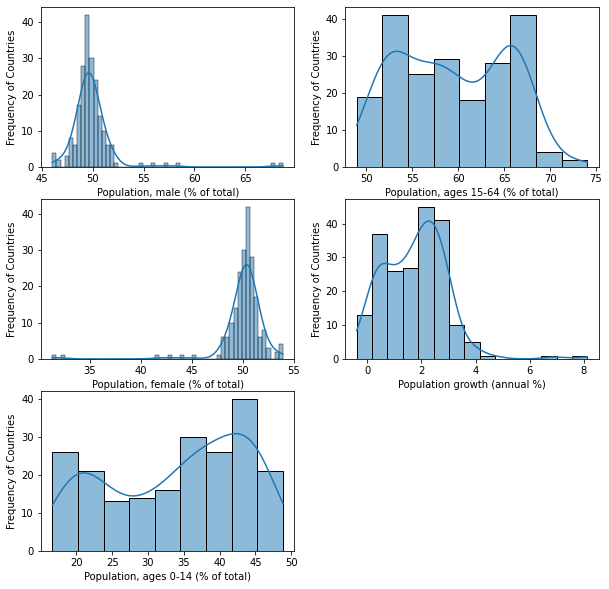

In [60]:
# Plotting frequency of countries for different indicators in the histogram
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.histplot(x='Population, male (% of total)',data=common_feature_stat_df,kde=True)
plt.ylabel('Frequency of Countries')
plt.xlabel('Population, male (% of total)')

plt.subplot(3,2,2)
sns.histplot(x='Population, ages 15-64 (% of total)',data=common_feature_stat_df,kde=True)
plt.ylabel('Frequency of Countries')
plt.xlabel('Population, ages 15-64 (% of total)')

plt.subplot(3,2,3)
sns.histplot(x='Population, female (% of total)',data=common_feature_stat_df,kde=True)
plt.ylabel('Frequency of Countries')
plt.xlabel('Population, female (% of total)')

plt.subplot(3,2,4)
sns.histplot(x='Population growth (annual %)',data=common_feature_stat_df,kde=True)
plt.ylabel('Frequency of Countries')
plt.xlabel('Population growth (annual %)')

plt.subplot(3,2,5)
sns.histplot(x='Population, ages 0-14 (% of total)',data=common_feature_stat_df,kde=True)
plt.ylabel('Frequency of Countries')
plt.xlabel('Population, ages 0-14 (% of total)')
plt.show()


In [61]:
# Population of male and female  is almost normally distributed across the globe but population growth, child population and adult population are not normally distributed across the globe

In [62]:
common_feature_stat_df['Population growth (annual %)'].mean()

1.7750555114324684

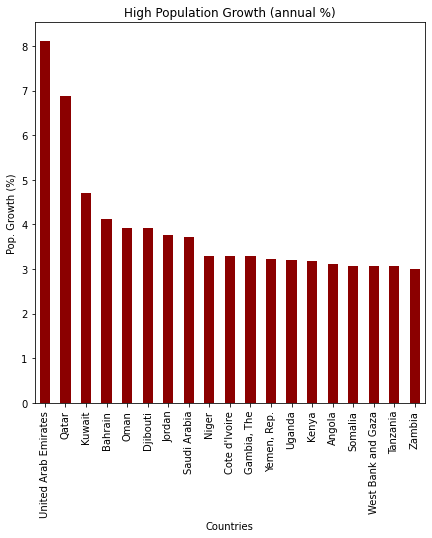

In [93]:
# Plotting highest and second highest population growth
common_feature_stat_df.loc[(common_feature_stat_df['Population growth (annual %)']>=3)]['Population growth (annual %)'].sort_values(ascending=False).plot.bar(figsize=(7,7),color='darkred')
plt.title('High Population Growth (annual %)')
plt.ylabel('Pop. Growth (%)')
plt.xlabel('Countries')
plt.show()

In [64]:
high_pop_growth=common_feature_stat_df.loc[(common_feature_stat_df['Population growth (annual %)']>=3)]['Population growth (annual %)'].sort_values(ascending=False).index
high_pop_growth

Index(['United Arab Emirates', 'Qatar', 'Kuwait', 'Bahrain', 'Oman',
       'Djibouti', 'Jordan', 'Saudi Arabia', 'Niger', 'Cote d'Ivoire',
       'Gambia, The', 'Yemen, Rep.', 'Uganda', 'Kenya', 'Angola', 'Somalia',
       'West Bank and Gaza', 'Tanzania', 'Zambia'],
      dtype='object')

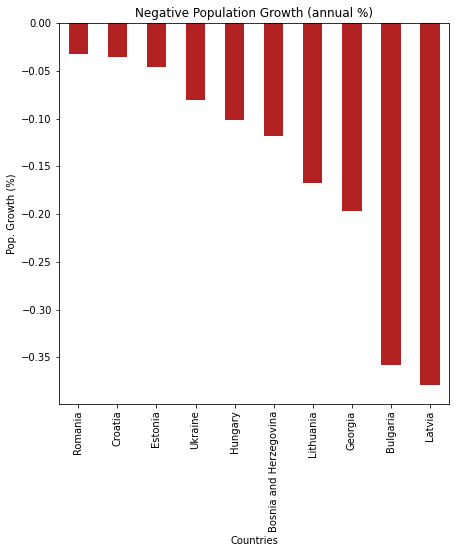

In [99]:
# Plotting negative population growth
common_feature_stat_df.loc[(common_feature_stat_df['Population growth (annual %)']<0)]['Population growth (annual %)'].sort_values(ascending=False).plot.bar(figsize=(7,7),color='firebrick')
plt.title('Negative Population Growth (annual %)')
plt.ylabel('Pop. Growth (%)')
plt.xlabel('Countries')
plt.show()

In [66]:
common_feature_stat_df.loc[(common_feature_stat_df['Population growth (annual %)']<0)]['Population growth (annual %)'].sort_values(ascending=True).index

Index(['Latvia', 'Bulgaria', 'Georgia', 'Lithuania', 'Bosnia and Herzegovina',
       'Hungary', 'Ukraine', 'Estonia', 'Croatia', 'Romania'],
      dtype='object')

In [67]:
common_feature_stat_df['male_female_diff']=common_feature_stat_df['Population, male (% of total)']-common_feature_stat_df['Population, female (% of total)']

In [68]:
common_feature_stat_df.loc[(common_feature_stat_df['male_female_diff']>5)]['male_female_diff'].sort_values(ascending=False)

United Arab Emirates     37.39219
Qatar                   35.506138
Bahrain                 16.703685
Kuwait                  14.424421
Oman                    12.008687
Saudi Arabia             9.420681
Name: male_female_diff, dtype: object

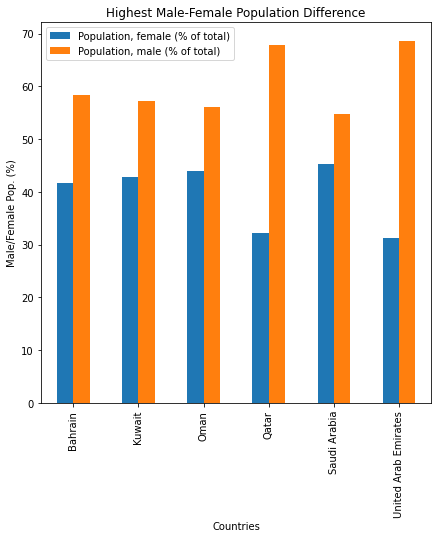

In [69]:
# Plotting Highest Male-Female Population Difference
common_feature_stat_df.loc[(common_feature_stat_df['male_female_diff']>5)][['Population, female (% of total)','Population, male (% of total)']].plot.bar(figsize=(7,7))
plt.title('Highest Male-Female Population Difference')
plt.ylabel('Male/Female Pop. (%)')
plt.xlabel('Countries')
plt.show()

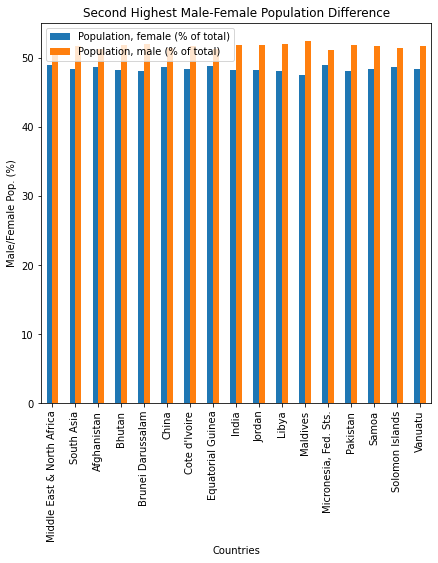

In [70]:
# Plotting Second Highest Male-Female Population Difference
common_feature_stat_df.loc[(common_feature_stat_df['male_female_diff']>2)&(common_feature_stat_df['male_female_diff']<=5)][['Population, female (% of total)','Population, male (% of total)']].plot.bar(figsize=(7,7))
plt.title('Second Highest Male-Female Population Difference')
plt.ylabel('Male/Female Pop. (%)')
plt.xlabel('Countries')
plt.show()

In [71]:
# Countries with high male-female population difference (gender imbalance)
high_male_female_diff=common_feature_stat_df.loc[(common_feature_stat_df['male_female_diff']>2)].index
high_male_female_diff

Index(['Middle East & North Africa', 'South Asia', 'Afghanistan', 'Bahrain',
       'Bhutan', 'Brunei Darussalam', 'China', 'Cote d'Ivoire',
       'Equatorial Guinea', 'India', 'Jordan', 'Kuwait', 'Libya', 'Maldives',
       'Micronesia, Fed. Sts.', 'Oman', 'Pakistan', 'Qatar', 'Samoa',
       'Saudi Arabia', 'Solomon Islands', 'United Arab Emirates', 'Vanuatu'],
      dtype='object')

In [72]:
set_list=[set(high_pop_growth),set(high_male_female_diff)]
high_pop_and_male_female_diff=list(set.intersection(*set_list))
high_pop_and_male_female_diff

['Bahrain',
 'Kuwait',
 'United Arab Emirates',
 'Qatar',
 'Oman',
 "Cote d'Ivoire",
 'Jordan',
 'Saudi Arabia']

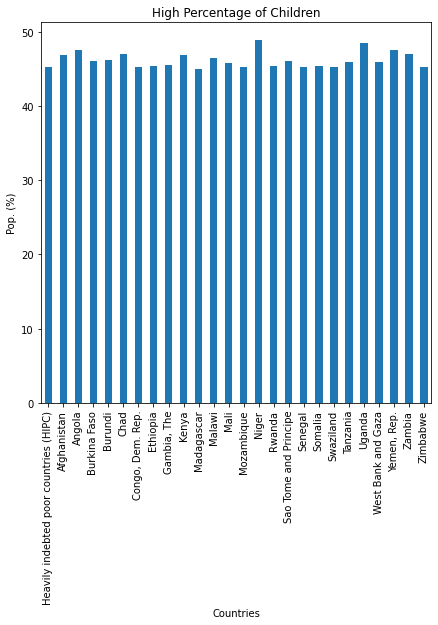

In [73]:
# Plotting High Percentage of Children in Population
common_feature_stat_df.loc[(common_feature_stat_df['Population, ages 0-14 (% of total)']>45)]['Population, ages 0-14 (% of total)'].plot.bar(figsize=(7,7))
plt.title('High Percentage of Children')
plt.ylabel('Pop. (%)')
plt.xlabel('Countries')
plt.show()

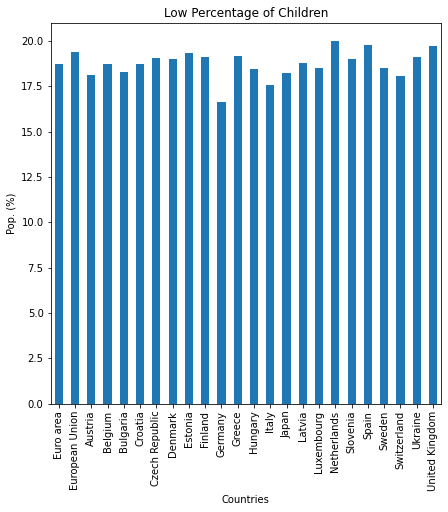

In [74]:
# Plotting Low Percentage of Children in Population
common_feature_stat_df.loc[(common_feature_stat_df['Population, ages 0-14 (% of total)']<20)]['Population, ages 0-14 (% of total)'].plot.bar(figsize=(7,7))
plt.title('Low Percentage of Children')
plt.ylabel('Pop. (%)')
plt.xlabel('Countries')
plt.show()

In [75]:
low_children_pop=common_feature_stat_df.loc[(common_feature_stat_df['Population, ages 0-14 (% of total)']<20)].index
low_children_pop

Index(['Euro area', 'European Union', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Germany',
       'Greece', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Luxembourg',
       'Netherlands', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom'],
      dtype='object')

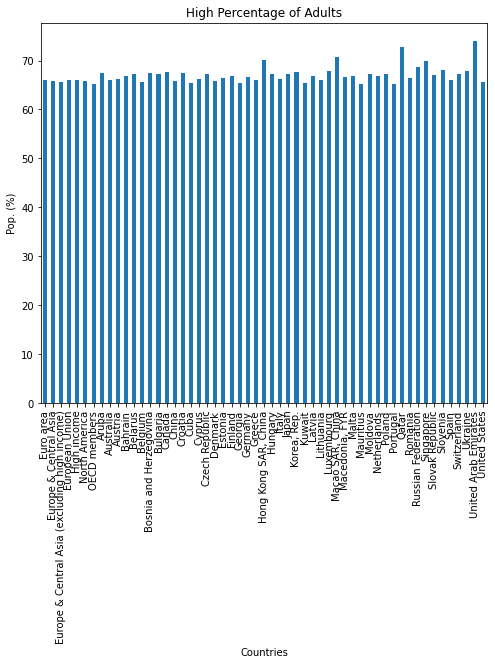

In [76]:
# Plotting High Percentage of Adults in Population
common_feature_stat_df.loc[(common_feature_stat_df['Population, ages 15-64 (% of total)']>65)]['Population, ages 15-64 (% of total)'].plot.bar(figsize=(8,7))
plt.title('High Percentage of Adults')
plt.ylabel('Pop. (%)')
plt.xlabel('Countries')
plt.show()

**Lets plot educational data !**

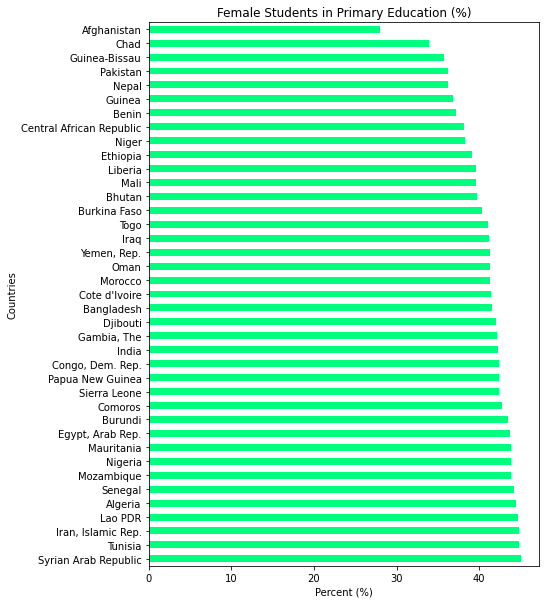

In [94]:
# Plotting less than 45% Female Students in Primary Education (%)
ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in primary education who are female (%)']<45)]['Percentage of students in primary education who are female (%)'].sort_values(ascending=False).plot.barh(figsize=(7,10),color='springgreen')
plt.title('Female Students in Primary Education (%)')
plt.ylabel('Countries')
plt.xlabel('Percent (%)')
plt.show()

In [95]:
len(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in primary education who are female (%)']<45)]['Percentage of students in primary education who are female (%)'].sort_values(ascending=False).index)

39

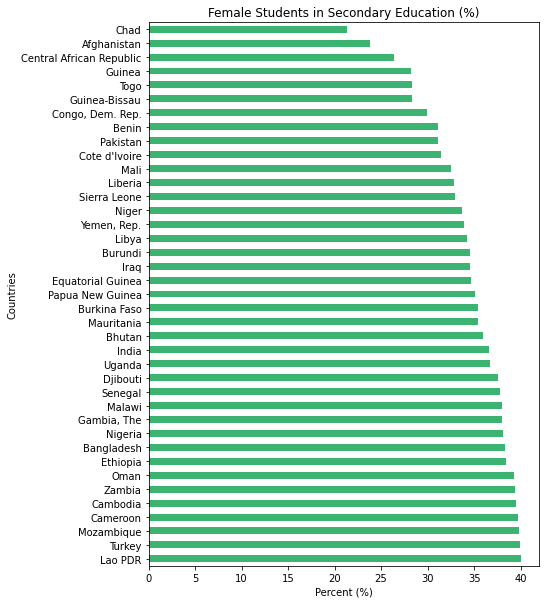

In [96]:
# Plotting less than 40% Female Students in Secondary Education (%)
ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in secondary general education who are female (%)']<40)]['Percentage of students in secondary general education who are female (%)'].sort_values(ascending=False).plot.barh(figsize=(7,10),color='mediumseagreen')
plt.title('Female Students in Secondary Education (%)')
plt.ylabel('Countries')
plt.xlabel('Percent (%)')
plt.show()


In [97]:
len(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in secondary general education who are female (%)']<40)]['Percentage of students in secondary general education who are female (%)'].sort_values(ascending=False).index)

39

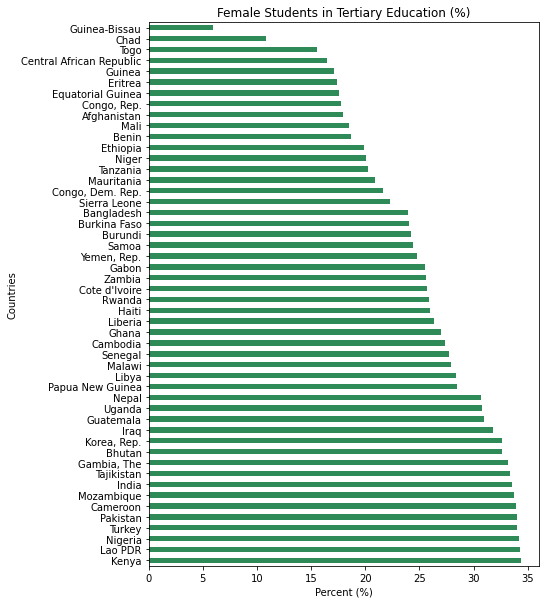

In [98]:
# Plotting less than 35% Female Students in Tertiary Education (%)
ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in tertiary education who are female (%)']<35)]['Percentage of students in tertiary education who are female (%)'].sort_values(ascending=False).plot.barh(figsize=(7,10),color='seagreen')
plt.title('Female Students in Tertiary Education (%)')
plt.ylabel('Countries')
plt.xlabel('Percent (%)')
plt.show()


In [82]:
len(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in tertiary education who are female (%)']<35)]['Percentage of students in tertiary education who are female (%)'].sort_values(ascending=False).index)

50

In [83]:
# Checking common countries with poor female education (educationally weak)
set_list=[set(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in primary education who are female (%)']<45)].index),set(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in secondary general education who are female (%)']<40)].index),set(ed_feature_stat_df.loc[(ed_feature_stat_df['Percentage of students in tertiary education who are female (%)']<35)].index)]
poor_female_ed=list(set.intersection(*set_list))
print(poor_female_ed)

['Chad', 'Guinea', 'Afghanistan', 'Pakistan', 'Gambia, The', 'Guinea-Bissau', 'Burundi', 'Bangladesh', 'Mali', 'Burkina Faso', 'Yemen, Rep.', 'Nigeria', 'Congo, Dem. Rep.', 'Benin', 'Central African Republic', 'Bhutan', 'Niger', 'Senegal', 'India', 'Mauritania', 'Sierra Leone', 'Liberia', 'Ethiopia', 'Lao PDR', 'Papua New Guinea', 'Togo', 'Iraq', "Cote d'Ivoire", 'Mozambique']


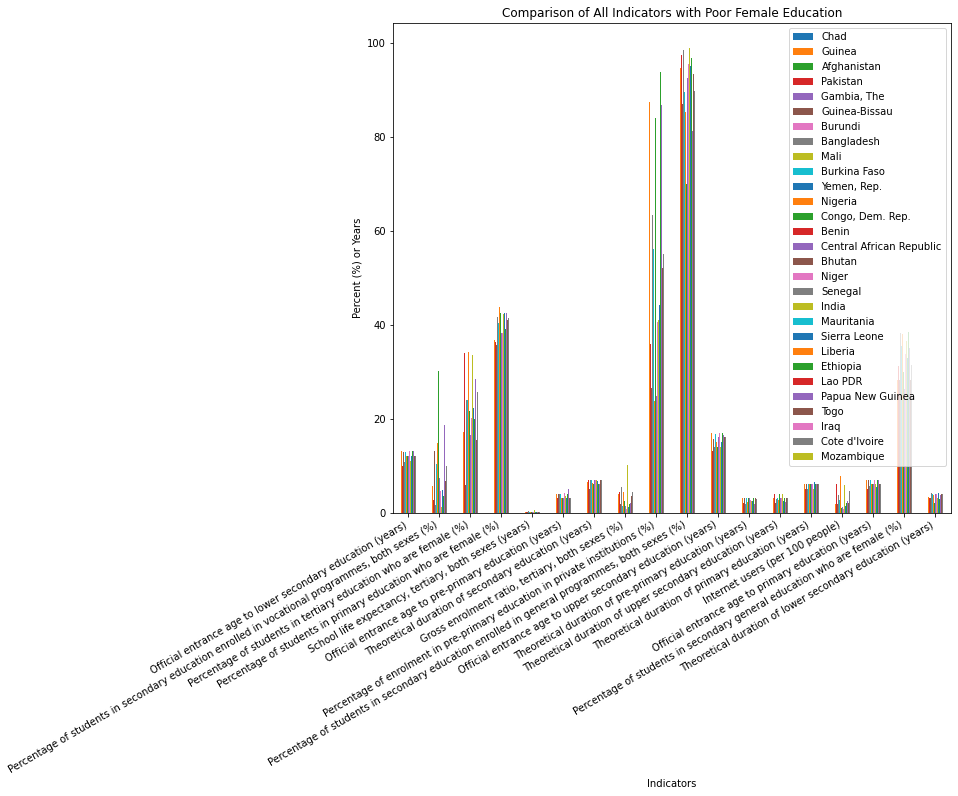

In [84]:
# Plotting top countries with poor female education
ed_feature_stat_df.transpose()[poor_female_ed].plot.bar(figsize=(10,10))
plt.title('Comparison of All Indicators with Poor Female Education')
plt.ylabel('Percent (%) or Years')
plt.xlabel('Indicators')
plt.gcf().autofmt_xdate()
plt.show()

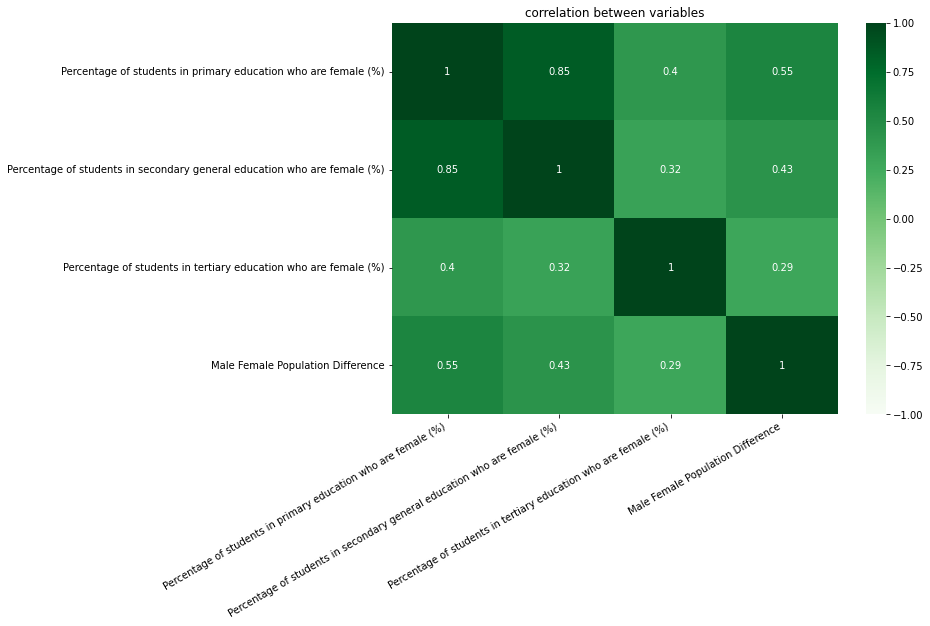

In [85]:
# Plotting correlation between our selected variables
df1=dict_of_clean_df.get('Afghanistan')[['Percentage of students in primary education who are female (%)',
                                        'Percentage of students in secondary general education who are female (%)',
                                        'Percentage of students in tertiary education who are female (%)']]
df2=pd.DataFrame((dict_of_filtered_df.get('Afghanistan')['Population, male (% of total)']-dict_of_filtered_df.get('Afghanistan')['Population, female (% of total)']),columns=['Male Female Population Difference'])

plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([df1,df2],axis=1).corr(), vmin=-1, cmap='Greens', annot=True)
plt.title('correlation between variables')
plt.gcf().autofmt_xdate()
plt.show()


In [86]:
# From the correlation plot, we can find that there is high positive correlation of primary education with secondary education and medium positive correlation with tertiary education
# Thus for improvement we must give intense focus on primary education of female

In [87]:
int(max(list(dict_of_clean_df.get('Afghanistan').index)))

2016

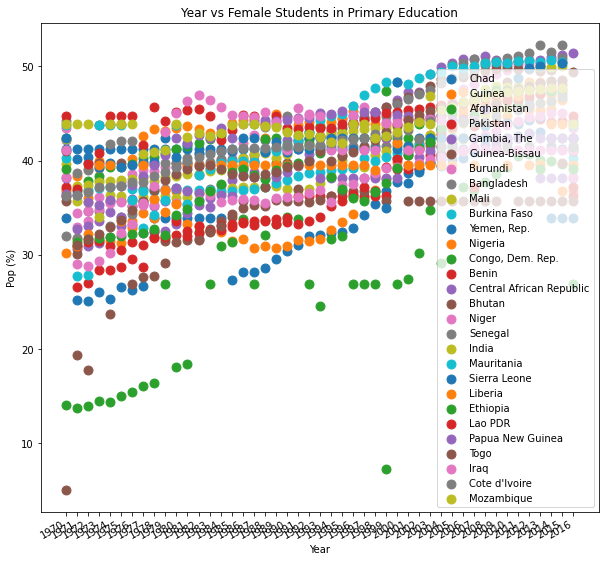

In [88]:
# Plottig Changes in female students in primary education in scatter
plt.figure(figsize=(10,10))
for k in poor_female_ed:
  x=list(dict_of_clean_df.get(k).index)
  y=list(dict_of_clean_df.get(k)['Percentage of students in primary education who are female (%)'])
  plt.scatter(x, y,s=80)

plt.title('Year vs Female Students in Primary Education')
plt.ylabel('Pop (%)')
plt.xlabel('Year')
plt.gcf().autofmt_xdate()

plt.legend(poor_female_ed)
plt.show()

In [89]:
# Checking countries with high male-female population difference and poor female education (gender imbalance and educationally weak both)
set_list=[set(high_male_female_diff),set(poor_female_ed)]
high_male_female_diff_and_poor_female_ed=list(set.intersection(*set_list))
high_male_female_diff_and_poor_female_ed

['Afghanistan', 'Pakistan', 'Bhutan', "Cote d'Ivoire", 'India']

In [90]:
set_list=[set(high_pop_and_male_female_diff),set(poor_female_ed)]
high_pop_male_female_diff_and_poor_female_ed=list(set.intersection(*set_list))
high_pop_male_female_diff_and_poor_female_ed

["Cote d'Ivoire"]

In [91]:
# Checking countries with poor children population and education
set_list=[set(low_children_pop),set(poor_female_ed)]
low_children_pop_and_ed=list(set.intersection(*set_list))
low_children_pop_and_ed


[]

**Lets check the trend of all major indicators in India**

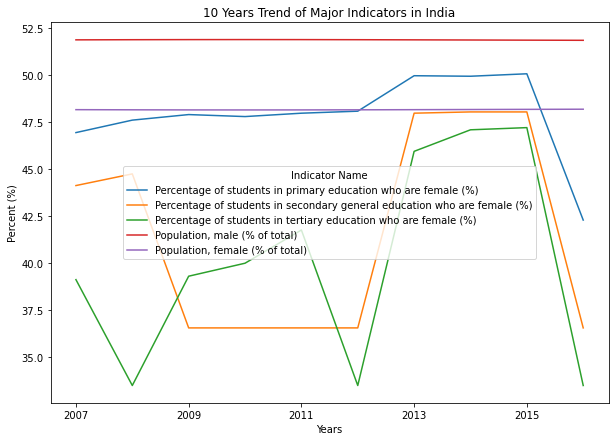

In [92]:
df1=dict_of_clean_df.get("India").iloc[-10:][['Percentage of students in primary education who are female (%)',
                   'Percentage of students in secondary general education who are female (%)',
                   'Percentage of students in tertiary education who are female (%)']]

df2=dict_of_filtered_df.get("India").iloc[-10:][['Population, male (% of total)',
                   'Population, female (% of total)']]
                   
pd.concat([df1,df2],axis=1).plot.line(figsize=(10,7))
plt.title("10 Years Trend of Major Indicators in India")
plt.ylabel('Percent (%)')
plt.xlabel('Years')
plt.show()

### **7. The Conclusion from the Data**


i. The population of males and females are almost normally distributed across the globe but population growth, child population, and adult population are not normally distributed across the globe

ii. Starting from 'United Arab Emirates' there are 19 countries with more than 3% population growth and starting from 'Latvia', there are 10 countries with negative population growth whereas mean population growth is 1.78 %

iii. Starting from 'United Arab Emirates' there are 6 countries with more than 5% male-female population difference and 17 countries with 2-5% male-female population difference.

iv. 'Kuwait', 'Bahrain', 'United Arab Emirates', 'Saudi Arabia', "Cote d'Ivoire", 'Jordan', 'Oman' and 'Qatar' are the 8 countries that have both high population growth and high gender imbalance.

v. Starting from 'Afghanistan' there are 39 countries where Female Students in Primary Education (%) is less than 45%. Starting from 'Chad', there are 39 countries where Female Students in Secondary Education (%) is less than 40% and starting from 'Guinea-Bissau', there are 50 countries where Female Students in Tertiary Education (%) is less than 35%

vi. Starting from 'Chad', there are 29 countries that have all poor female educational indicators. Poor female education is the root cause of lower educational growth of any country in the long run.

vii. There is a high positive correlation of primary education with secondary education and a medium positive correlation with tertiary education and thus we must give our main focus on primary education of female

viii. For all 29 countries with poor female education, there is no significant progress in primary education of females for the last 47 years (1970-2016). Progress is only 5%. 25-30% in lower margin and 45-50% in upper margin

ix. Higher positive or negative population growth and higher gender imbalance are the root causes of system imbalance. Lower educational growth is the root cause of system weakness. Again, system imbalance and system weakness together cause unhappiness and may lead to system breakdown. "Cote d'Ivoire", 'Afghanistan', 'India', 'Bhutan' and 'Pakistan' have both high gender imbalance and poor female education. These five countries need to give immediate attention to improving the female population and working on female education.